In [201]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [202]:
# Manufacturing Dataset consists of the following columns:

# 1. Temperature (°C)	
# 2. Pressure (kPa)	
# 3. Temperature x Pressure	
# 4. Material Fusion Metric	
# 5. Material Transformation Metric	
# 6. Quality Rating: Target Column

In [203]:
df = pd.read_csv('E:\\Data_Analysis_Datasets\\manufacturing_xgr.csv')

In [204]:
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [206]:
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


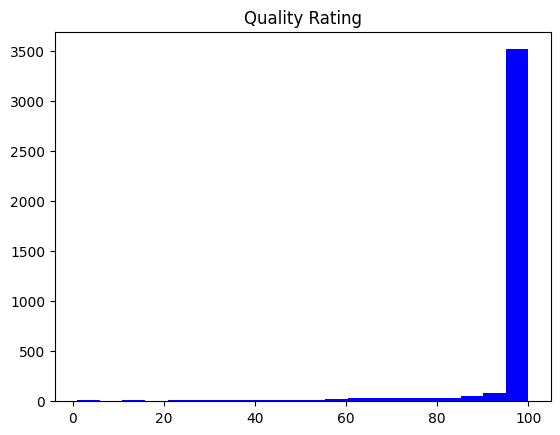

In [207]:
plt.hist(df['Quality Rating'], bins=20, color='blue')
plt.title('Quality Rating')
plt.show()

In [208]:
df.isnull().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

### checking data for outliers

In [209]:
def check_outlier(column):
    plt.figure(figsize=(6,4))
    sns.boxplot(df[column])
    plt.xlabel(column, fontsize=12)
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.show()


# df.boxplot()
# # Rotate x-axis labels
# plt.xticks(rotation=90)
# plt.show()

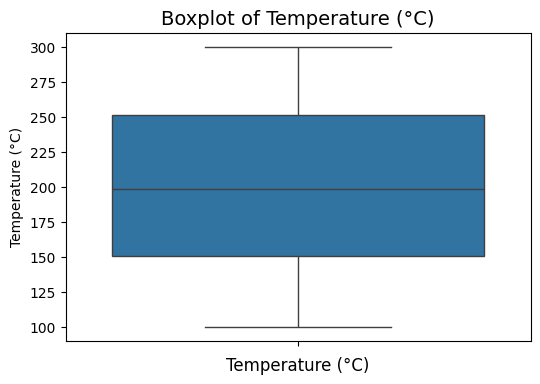

In [210]:
check_outlier('Temperature (°C)')

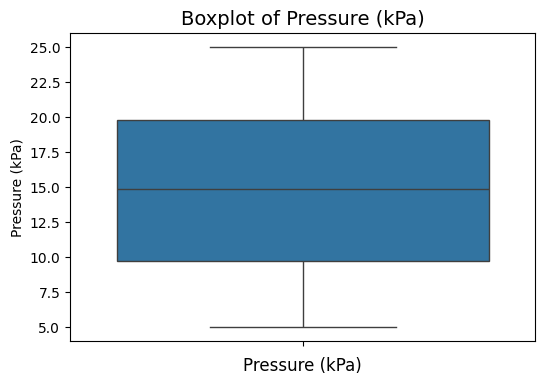

In [211]:
check_outlier('Pressure (kPa)')

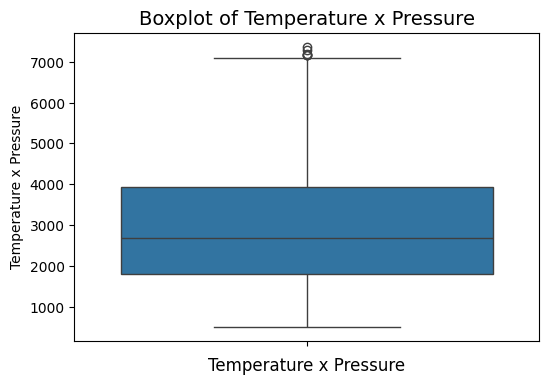

In [212]:
check_outlier('Temperature x Pressure')

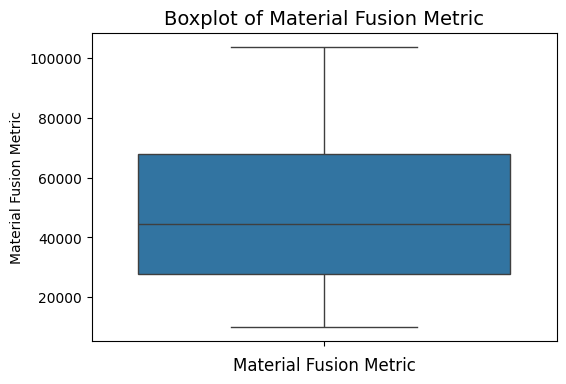

In [213]:
check_outlier('Material Fusion Metric')

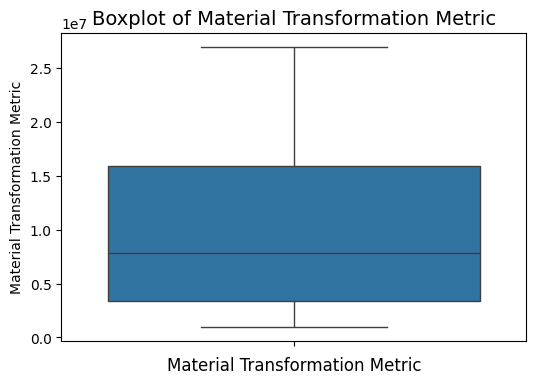

In [214]:
check_outlier('Material Transformation Metric')

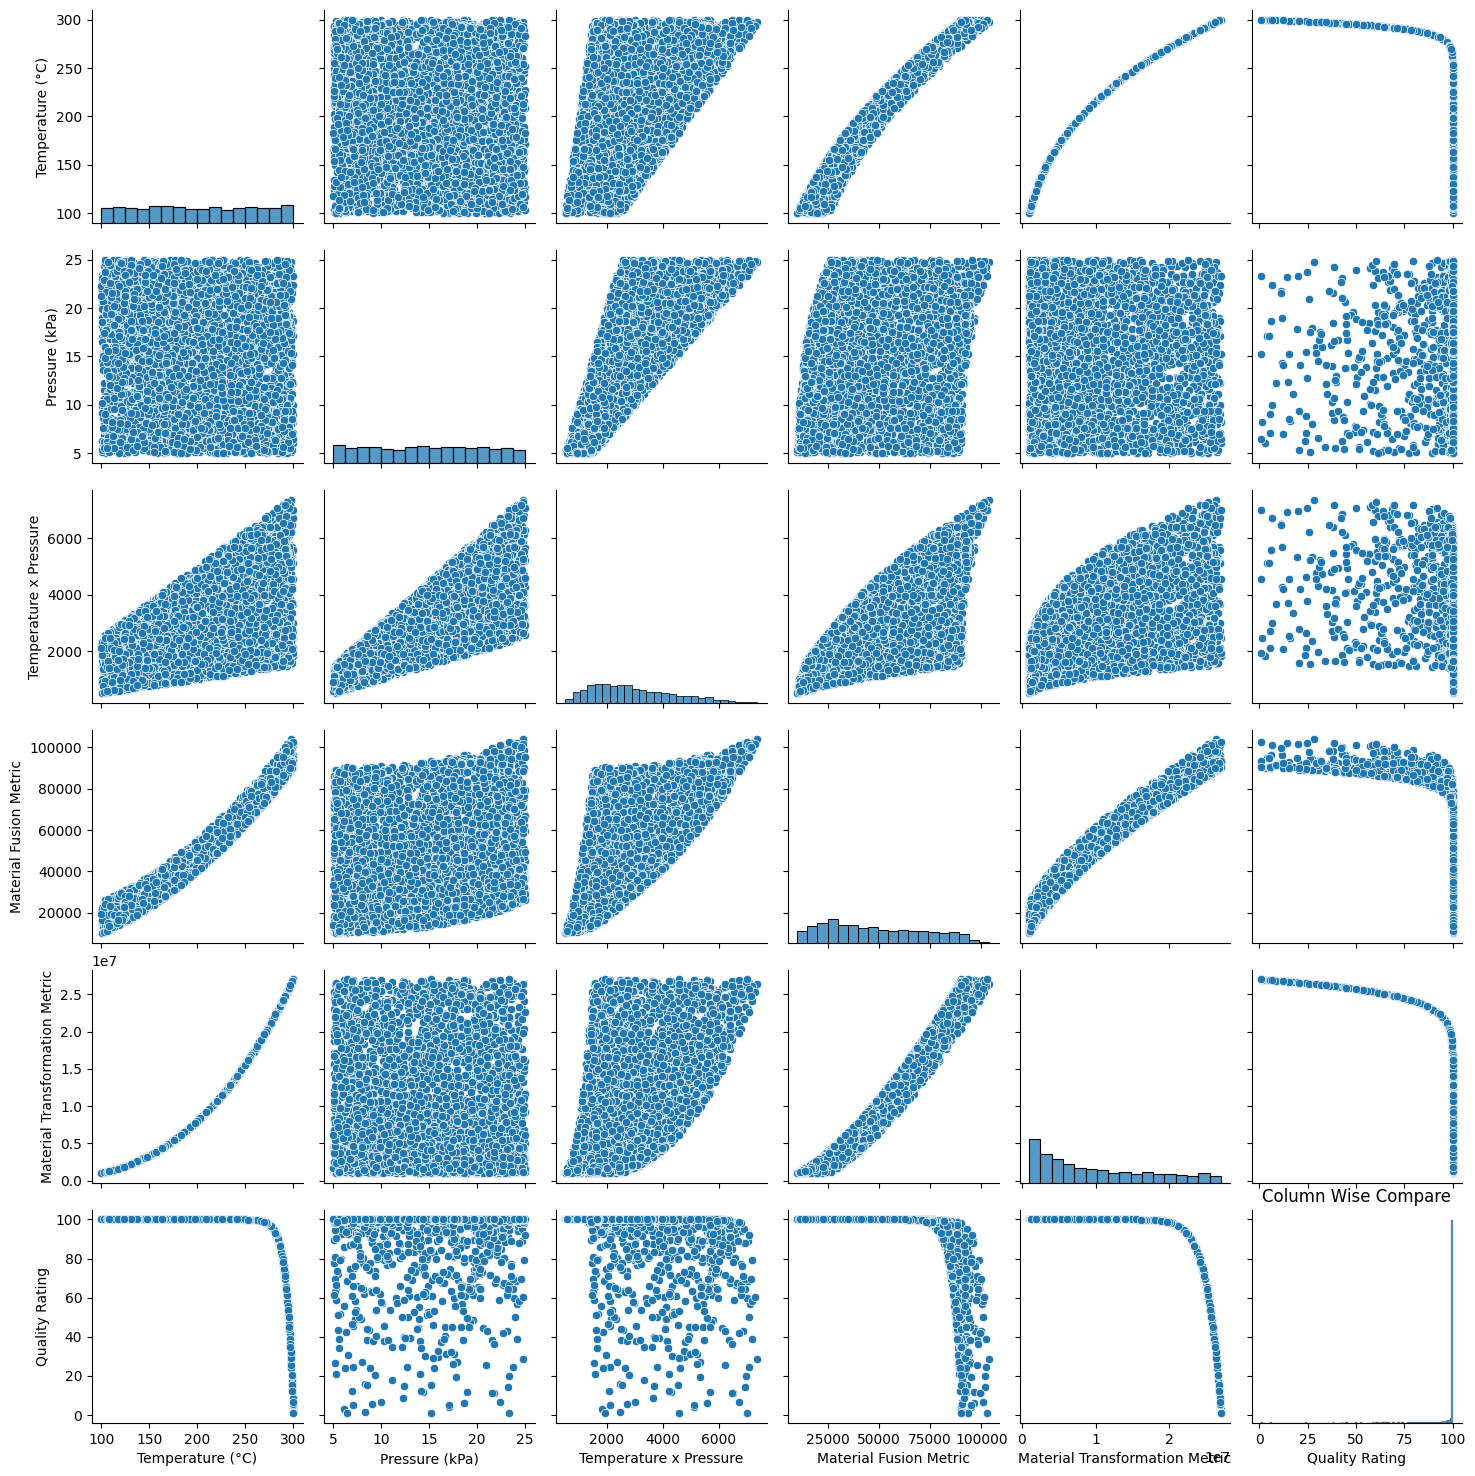

In [215]:
sns.pairplot(df)
plt.title("Column Wise Compare")
plt.show()

In [216]:
df.corr()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
Temperature (°C),1.000000,-0.024754,0.571743,0.974901,0.971210,-0.461279
Pressure (kPa),-0.024754,1.000000,0.773572,0.151095,-0.022862,0.013129
Temperature x Pressure,0.571743,0.773572,1.000000,0.694733,0.555579,-0.258474
Material Fusion Metric,0.974901,0.151095,0.694733,1.000000,0.976708,-0.511972
Material Transformation Metric,0.971210,-0.022862,0.555579,0.976708,1.000000,-0.575756
Quality Rating,-0.461279,0.013129,-0.258474,-0.511972,-0.575756,1.000000


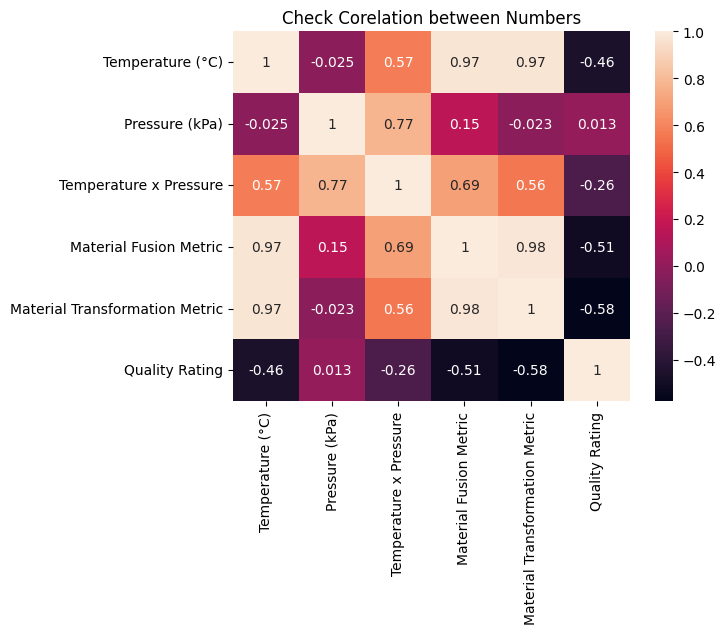

In [217]:
# check corelation between numbers
sns.heatmap(df.corr(), annot=True)
plt.title("Check Corelation between Numbers")
plt.show()

- Material Fusion Metric & Material Transformation Metric high corelation with Temperature 
- Material Fusion Metric corelate with Material Transformation Metric

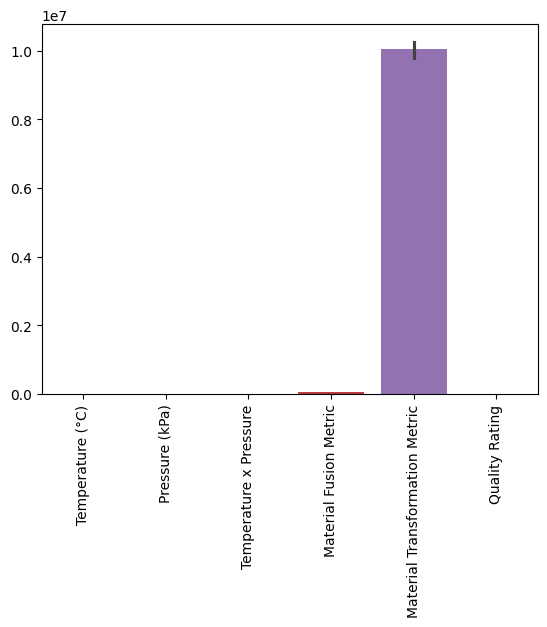

In [218]:
sns.barplot(df)
plt.xticks(rotation=90)
plt.show()

# Train Test Split

In [219]:
x = df.drop('Quality Rating', axis=1)
y = df['Quality Rating']

In [220]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

In [221]:
X_test.shape, y_test.shape

((792, 5), (792,))

In [222]:
X_train.shape, y_train.shape

((3165, 5), (3165,))

In [223]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [224]:
xgr = XGBRegressor()
cv = GridSearchCV(estimator=xgr, param_grid=param, scoring='r2', cv=5, verbose=5)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.999 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.999 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.998 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.998 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.998 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9;, score=0.999 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9;, score=0.999 total time=   0.0s
[CV 3/5] END colsampl

,estimator,"XGBRegressor(...bda=None, ...)"
,param_grid,"[{'colsample_bytree': [0.8, 0.9], 'learning_rate': [0.1, 0.2, ...], 'max_depth': [3, 4, ...], 'n_estimators': [50], ...}]"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,5
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [225]:
# results = pd.DataFrame(cv.cv_results_)
# results.sort_values('mean_test_score', inplace=True, ascending=False)
# results.head(10)

In [226]:
print(f'Best Parameters:\n {cv.best_params_}')

Best Parameters:
 {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}


In [227]:
# # Candidate models
# models = {
#     "XGBRegressor": XGBRegressor(colsample_bytree=0.8, learning_rate=0.2, max_depth=5,
#                                  n_estimators=50, subsample=0.8, random_state=0),
#     "RandomForest": RandomForestRegressor(n_estimators=100, random_state=0),
#     "LinearRegression": LinearRegression()
# }

# results = {}

# # Train and evaluate each model
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     r2 = r2_score(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     mape = mean_absolute_percentage_error(y_test, y_pred)
#     cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()

#     results[name] = {
#         "R2": r2,
#         "MAE": mae,
#         "RMSE": rmse,
#         "MAPE": mape,
#         "CV Mean": cv_score,
#         "Model": model
#     }

# # Show results
# for name, metrics in results.items():
#     print(f"\n{name}")
#     print(f"R2: {metrics['R2']:.4f}")
#     print(f"MAE: {metrics['MAE']:.4f}")
#     print(f"RMSE: {metrics['RMSE']:.4f}")
#     print(f"MAPE: {metrics['MAPE']:.4f}")
#     print(f"CV Mean: {metrics['CV Mean']:.4f}")

# # Pick best model (highest R²)
# best_model_name = max(results, key=lambda name: results[name]["R2"])
# best_model = results[best_model_name]["Model"]

# print(f"\n✅ Best Model: {best_model_name} with R2 = {results[best_model_name]['R2']:.4f}")

# # Save the best model
# pk.dump(best_model, open("manufacturing_quality_rating_model.pkl", "wb"))

In [228]:
xgb_r = XGBRegressor(colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8)
xgb_r.fit(X_train, y_train)
y_pred = xgb_r.predict(X_test)

In [229]:
y_pred

array([99.99654  , 99.99654  , 99.52494  , 99.99654  , 99.52494  ,
       95.97161  , 99.99654  , 99.99654  , 99.99654  , 99.99654  ,
       99.99347  , 99.99654  , 99.99654  , 99.99654  , 99.99654  ,
       99.6724   , 99.99654  , 63.292515 , 99.99654  , 99.99654  ,
       99.90313  , 99.99654  , 99.99654  , 99.99654  , 99.99654  ,
       99.99654  , 99.99654  , 99.99654  , 99.99654  , 99.99654  ,
       99.99654  , 99.99654  , 51.101955 , 99.99654  , 99.99654  ,
       74.7037   , 99.99654  , 99.99654  , 99.99654  , 99.99654  ,
       99.99654  , 68.599434 , 99.99654  , 99.99654  , 99.99654  ,
       99.99654  , 98.20502  , 99.94231  , 98.18253  , 99.99654  ,
       89.240326 , 99.99654  , 99.99654  , 99.99654  , 99.6724   ,
       99.99654  , 99.90313  , 99.99654  , 62.35458  , 99.99654  ,
       60.32723  , 99.99654  , 99.99654  , 99.99654  , 99.41851  ,
       99.99654  , 99.99654  , 99.99654  , 99.99654  , 99.99654  ,
       99.90313  , 99.99654  , 97.084435 , 99.99654  , 99.9908

In [230]:
xgb_r.feature_importances_

array([7.0074379e-01, 4.6377696e-05, 5.4691165e-05, 8.9077621e-05,
       2.9906616e-01], dtype=float32)

In [231]:
print("R2 Score")
r2_score(y_test, y_pred)

R2 Score


0.9997708349098915

In [232]:
print("Mean Absolute Error")
mean_absolute_error(y_test, y_pred)

Mean Absolute Error


0.059915634897470184

In [233]:
print("Mean Squared Error")
np.sqrt(mean_squared_error(y_test, y_pred))

Mean Squared Error


np.float64(0.20043113235770796)

In [234]:
print("Mean Absolute Percentage Error")
mean_absolute_percentage_error(y_test, y_pred)

Mean Absolute Percentage Error


0.0013456106395507467

In [235]:
print(cross_val_score(xgr, X_train, y_train))
print(cross_val_score(xgr, X_train, y_train).mean())

[0.99983343 0.99977036 0.99980705 0.99976466 0.99986173]
0.999807445502776


In [236]:
X_train.sample()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
3325,297.59954,15.34626,4567.039963,92179.64861,2.635681e+07


In [237]:
input_data = pd.DataFrame([[204.836772, 10.579958, 2167.164468, 43142.37624, 8.594450e+06]], columns=['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure', 'Material Fusion Metric', 'Material Transformation Metric'])

In [238]:
input_data = pd.DataFrame([[143.03, 20.80, 2976.48, 29470.36, 2.93]], columns=['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure', 'Material Fusion Metric', 'Material Transformation Metric'])

In [251]:
input_data = pd.DataFrame([[01.5405, 10.54, 10.1, 50.547, 900.5050]], columns=['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure', 'Material Fusion Metric', 'Material Transformation Metric'])

In [252]:
xgb_r.predict(input_data)

array([99.99654], dtype=float32)

In [240]:
import pickle as pk

In [241]:
pk.dump(xgb_r, open('manufacturing_quality_rating_model.pkl', 'wb'))